In [2]:
import torch
import torch.nn as nn
import math

In [39]:
input = torch.tensor([[1.0, 2.0, 3.0, 4.0],
                      [1.0, 2.0, 3.0, 4.0],
                      [1.0, 2.0, 3.0, 4.0],])

print("input.shape:\n", input.shape)

input_dim = input.size(1)   # 4
output_dim = 2

L = nn.Linear(in_features = input_dim, out_features = output_dim, bias=False)
# 实例化L 线性变换 输入[n x 4]--->输出[n x 2]
print("L.weight.data:\n", L.weight.data)
weight = torch.empty((2, 4))
ouput = L(input)
print(ouput)

input.shape:
 torch.Size([3, 4])
L.weight.data:
 tensor([[-0.0873, -0.0385, -0.2744,  0.0600],
        [ 0.3556,  0.0840, -0.1123, -0.1267]])
tensor([[-0.7474, -0.3200],
        [-0.7474, -0.3200],
        [-0.7474, -0.3200]], grad_fn=<MmBackward0>)


### 1. Linear线性变换`input`到`output`经历了哪些过程？有哪些中间量？
#### 1.1. 实例化Linear对象`L=nn.Linear()`
1. 确定`input`和`output`的维度m和s，是否使用`bias`
2. input: `[n x m]` output: `[n x s]`
#### 1.2. 执行线性变换`L(input)`
##### 1.2.1. 初始化`weight`和`bias` 之后进行线性计算 `F.linear(input, self.weight, self.bias)`
- `self.weight = Parameter(torch.empty((out_features, in_features), **factory_kwargs))`
- weight初始化为[s x m]的Tensor
- `init.kaiming_uniform_(self.weight, a=math.sqrt(5))`
- weight中的元素符合均匀分布，a用来确定分布界限
- `fan_in, _ = init._calculate_fan_in_and_fan_out(self.weight)`
- `bound = 1 / math.sqrt(fan_in) if fan_in > 0 else 0`
- `init.uniform_(self.bias, -bound, bound)`
- bias中的元素符合均匀分布
#### 1.2.2 线性变换 `y = kx + b`

- k = `weight`  [s x m]
- x = `input`   [n x m]
- b = `bias`    [1 x s]
- y = `output`  [n x s]
* `output` = `input`乘`weight`的`转置`再加上`bias`

In [41]:
import torch
import torch.nn.functional as F

input = torch.tensor([[1.0, 2.0, 3.0, 4.0],
                      [1.0, 2.0, 3.0, 4.0],
                      [1.0, 2.0, 3.0, 4.0],])

weight = torch.tensor([[0.1, 0.2],
                       [0.3, 0.4],
                       [0.5, 0.6],
                       [0.7, 0.8]])
weight = weight.view(-1, 4)
print("weight:\n",weight)
bias = torch.tensor([0.1, 0.2])

output = F.linear(input, weight, bias)

print(output)   # 3.1 = 1*0.1 + 2*0.2 + 3*0.3 + 4*0.4 + 0.1
                # 7.2 = 5*0.5 + 6*0.6 + 7*0.7 + 8*0.8 + 0.2

weight:
 tensor([[0.1000, 0.2000, 0.3000, 0.4000],
        [0.5000, 0.6000, 0.7000, 0.8000]])
tensor([[3.1000, 7.2000],
        [3.1000, 7.2000],
        [3.1000, 7.2000]])


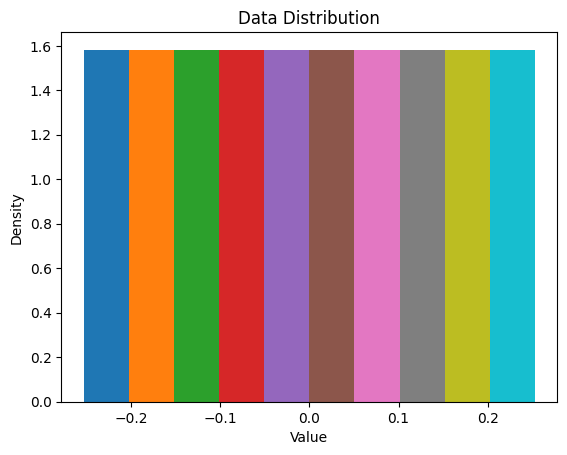

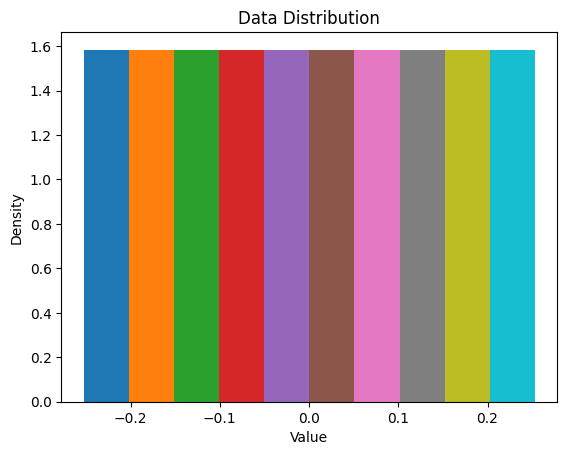

In [38]:
import torch
import torch.nn as nn
import math
# 创建一个形状为(100, 10)的参数张量
weights = nn.Parameter(torch.empty(100, 10))

# 使用Kaiming均匀初始化
nn.init.kaiming_uniform_(weights, a = math.sqrt(5))

import matplotlib.pyplot as plt
# 绘制数据分布图
plt.hist(weights.detach().numpy(), bins=1, density=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Data Distribution')
plt.show()

linear = nn.Linear(in_features = 10, out_features = 100, bias=False)
# 绘制数据分布图
plt.hist(linear.weight.data.numpy(), bins=1, density=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Data Distribution')
plt.show()